The following equations obtained using Newton's laws of motion are solved in the code using an implicit euler method:

$$\frac{d^2x}{dt^2}=-\frac{a}{m}\sqrt{{v_x}^2+{v_y}^2}-\frac{wb}{m}v_y$$

$$\frac{d^2y}{dt^2}=--g-\frac{a}{m}\sqrt{{v_x}^2+{v_y}^2}-\frac{wb}{m}v_x$$

$$v_x=\frac{dx}{dt}$$
$$v_y=\frac{dy}{dt}$$

The constant a, b, w and m are 0.05, 0.02, 0.1 and 0.25, respectively.

In [1]:
from numpy import array, sin, cos, zeros, ones, linspace
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [2]:
def acc_x(vx,vy): # for calculation of x-acceleration
    return -(a/m)*((vx**2+vy**2)**0.5)*vx-(w*b/m)*vy

def acc_y(vx,vy): # for calculation of y-acceleration
    return -g-(a/m)*((vx**2+vy**2)**0.5)*vy+(w*b/m)*vx

def f(z): #fsolve will solve these two functions
    a,b=z
    f1=vx[i]-a+dt*acc_x(a,b)
    f2=vy[i]-b+dt*acc_y(a,b)
    return [f1,f2]


In [6]:
a=0.05
b=0.02
m=0.25
g=9.81
w=0.1

dt = 0.5              # time step size
tf = 10            # final time
nt=int(tf/dt)       # number of time steps to be calculated
v_ini=30            # initial absolute velocity
angle=1.0472        # 60 degrees in radians, can be changed to any angle
vx=[v_ini*cos(angle)]*ones(nt+1) #initial x-velocity
vy=[v_ini*sin(angle)]*ones(nt+1) #initial y-velocity
x=zeros(nt+1) # this will initialize the initial x-coordinate as zero
y=zeros(nt+1) # this will initialize the initial y-coordinate as zero

In [7]:
for i in range(0,nt):  #implicit euler method loop
    v=fsolve(f,[vx[i+1],vy[i+1]]) # v is the solution obtained by solving the nonlinear equations obtained
    #print(v)
    vx[i+1]=v[0]
    vy[i+1]=v[1]
    x[i+1]=x[i]+dt*vx[i+1]
    y[i+1]=y[i]+dt*vy[i+1]


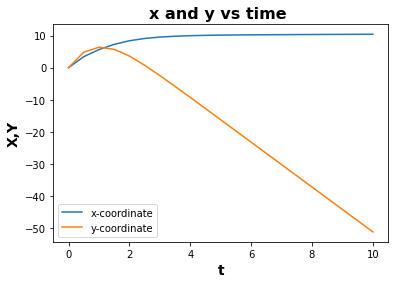

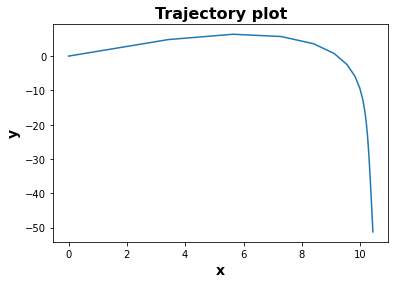

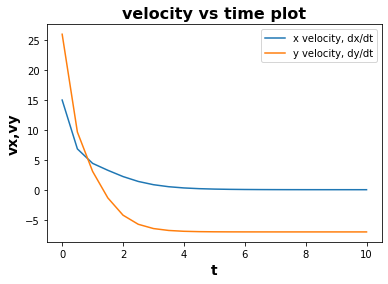

In [5]:
t = [ i for i in linspace(0,tf,nt+1) ]
t2 = [ i for i in linspace(0,tf,nt+1) ]
#plotting the x and y position of particle with time
plt.plot(t,x,label='x-coordinate')
plt.plot(t,y, label='y-coordinate')
plt.title('x and y vs time ', fontweight = 'bold', fontsize = 16)
plt.xlabel('t', fontweight = 'bold', fontsize = 14)
plt.ylabel('X,Y', fontweight = 'bold', fontsize = 14)
plt.legend()
plt.show()
# plotting the trajectory of the particle
plt.figure(2)
plt.plot(x,y)
plt.title('Trajectory plot', fontweight = 'bold', fontsize = 16)
plt.xlabel('x', fontweight = 'bold', fontsize = 14)
plt.ylabel('y', fontweight = 'bold', fontsize = 14)
plt.show()
# plotting the x and y velocities with time
plt.figure(3)
plt.plot(t2,vx,label='x velocity, dx/dt')
plt.plot(t2,vy,label='y velocity, dy/dt')
plt.title('velocity vs time plot', fontweight = 'bold', fontsize = 16)
plt.xlabel('t', fontweight = 'bold', fontsize = 14)
plt.ylabel('vx,vy', fontweight = 'bold', fontsize = 14)
plt.legend()
plt.show()